# Scarf tutorial

Following the Scarf tutorial https://scarf.readthedocs.io/en/latest/vignettes/basic_tutorial_scRNAseq.html

Scarf is a library for the analysis of single-cell data. It uses the zarr format to store data (a format optimized for the cloud) and it is optimized for running large scale analysis using a low memory footprint.

In [1]:
!pip install scarf cmocean

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import scarf
import helical

INFO:datasets:PyTorch version 2.5.1+cu118 available.
INFO:datasets:Polars version 1.21.0 available.
INFO:helical:Caduceus not available: If you want to use this model, ensure you have a CUDA GPU and have installed the optional helical[mamba-ssm] dependencies.


In [3]:
scarf.fetch_dataset(
    'tenx_5K_pbmc_rnaseq',
    save_path='scarf_datasets'
)

In [4]:
reader = scarf.CrH5Reader('scarf_datasets/tenx_5K_pbmc_rnaseq/data.h5')
reader.nCells, reader.nFeatures


(5025, 33538)

In [5]:
writer = scarf.CrToZarr(
    reader,
    zarr_loc='scarf_datasets/tenx_5K_pbmc_rnaseq/data.zarr',
    chunk_size=(2000, 1000)
)
writer.dump(batch_size=1000)

  0%|                                                                                                         …

In [6]:
ds = scarf.DataStore(
    'scarf_datasets/tenx_5K_pbmc_rnaseq/data.zarr',
    nthreads=4,
    min_features_per_cell=10
)

(RNA) Computing nCells and dropOuts:   0%|                                                                    …

(RNA) Computing nCounts:   0%|                                                                                …

(RNA) Computing nFeatures:   0%|                                                                              …

(RNA) Computing RNA_percentMito:   0%|                                                                        …

(RNA) Computing RNA_percentRibo:   0%|                                                                        …

In [7]:
ds

DataStore has 5025 (5025) cells with 1 assays: RNA
   Cell metadata:
            'I', 'ids', 'names', 'RNA_nCounts', 'RNA_nFeatures', 
            'RNA_percentMito', 'RNA_percentRibo'
   RNA assay has 14283 (33538) features and following metadata:
            'I', 'ids', 'names', 'dropOuts', 'nCells', 
          

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

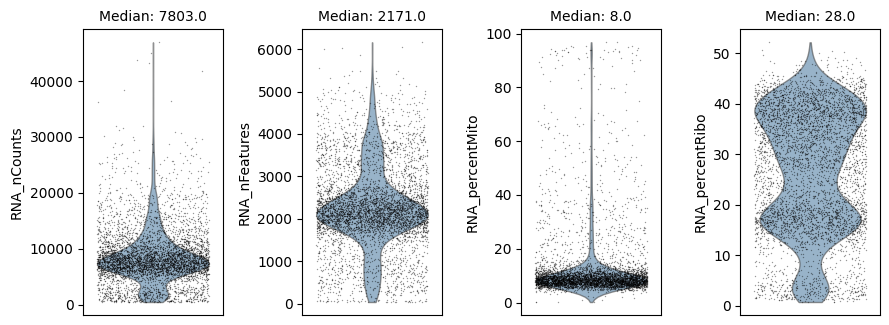

In [8]:
ds.plot_cells_dists()


In [9]:
ds.filter_cells(
    attrs=['RNA_nCounts', 'RNA_nFeatures', 'RNA_percentMito'],
    highs=[15000, 4000, 15],
    lows=[1000, 500, 0]
)

INFO: 597 cells flagged for filtering out using attribute RNA_nCounts
INFO: 461 cells flagged for filtering out using attribute RNA_nFeatures
INFO: 612 cells flagged for filtering out using attribute RNA_percentMito


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

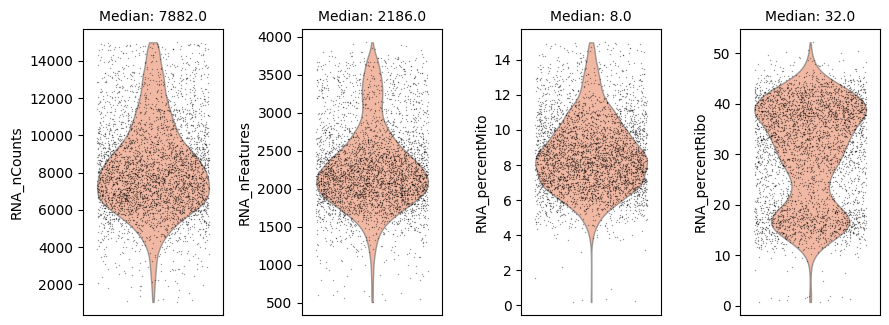

In [10]:
ds.plot_cells_dists(cell_key='I', color='coral')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

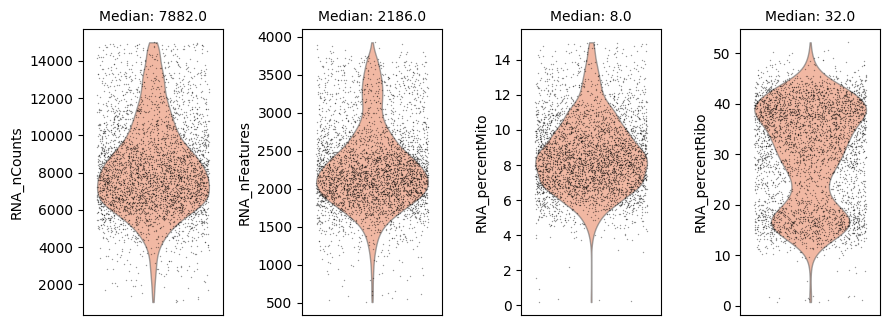

In [11]:
ds.plot_cells_dists(cell_key='I', color='coral')

In [12]:
ds.cells.head()

,I,ids,names,RNA_nCounts,RNA_nFeatures,RNA_percentMito,RNA_percentRibo
0,True,AAACCCAAGCGTATGG-1,AAACCCAAGCGTATGG-1,13537.0,3503.0,10.844353,16.783630
1,True,AAACCCAGTCCTACAA-1,AAACCCAGTCCTACAA-1,12668.0,3381.0,5.975687,20.034733
2,False,AAACCCATCACCTCAC-1,AAACCCATCACCTCAC-1,962.0,346.0,53.430353,2.494802
3,True,AAACGCTAGGGCATGT-1,AAACGCTAGGGCATGT-1,5788.0,1799.0,10.919143,28.783690
4,True,AAACGCTGTAGGTACG-1,AAACGCTGTAGGTACG-1,13186.0,2887.0,7.955407,35.750038


## Feature Selection

In [13]:
ds.RNA.feats.head()


,I,ids,names,dropOuts,nCells
0,False,ENSG00000243485,MIR1302-2HG,5025,0
1,False,ENSG00000237613,FAM138A,5025,0
2,False,ENSG00000186092,OR4F5,5025,0
3,True,ENSG00000238009,AL627309.1,4976,49
4,False,ENSG00000239945,AL627309.3,5022,3


INFO: Calculating summary statistics


(RNA) Computing nCells:   0%|                                                                                 …

(RNA) Computing normed_tot:   0%|                                                                             …

(RNA) Computing sigmas:   0%|                                                                                 …

INFO: Calculating HVGs
INFO: 498 genes marked as HVGs


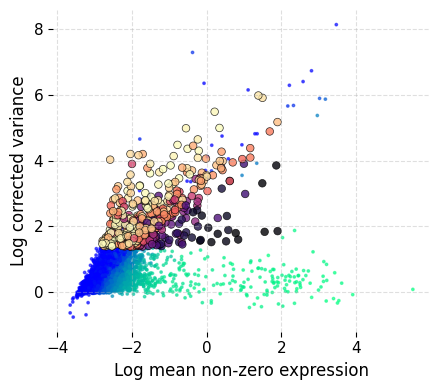

In [14]:
ds.mark_hvgs(
    min_cells=20,
    top_n=500,
    min_mean=-3,
    max_mean=2,
    max_var=6
)

In [15]:
#ds.RNA.feats.head()


: 

In [ ]:
ds.make_graph(
    feat_key='hvgs',
    k=11,
    dims=15,
    n_centroids=100
)

Normalizing with feature subset:   0%|                                                                        …

Writing data to normed__I__hvgs/data:   0%|                                                                   …

Calculating mean of norm. data:   0%|                                                                         …

Calculating std. dev. of norm. data:   0%|                                                                    …

Fitting PCA:   0%|                                                                                            …

Fitting ANN:   0%|                                                                                            …

In [1]:
ds.run_umap(
    n_epochs=250,
    spread=5,
    min_dist=1,
    parallel=True
)

NameError: name 'ds' is not defined